# 1. Preprocesamiento

## 1.1 Carga de datos e importación de librerías

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [95]:

df = pd.read_csv("Rendimiento-2022/20230209_Rendimiento_2022_20230131_WEB.csv", sep=";", encoding="utf-8")

/var/folders/l5/2rxggm8s7mv2g33kfr8sbw780000gn/T/ipykernel_89299/1816794348.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Rendimiento-2022/20230209_Rendimiento_2022_20230131_WEB.csv", sep=";", encoding="utf-8")


In [96]:
df.shape

(3405130, 37)

In [97]:
## Show all cols
pd.set_option('display.max_columns', None)
df

,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,459781,1,198107,40,15,15101,ARICA,400,410,41001,"6,6",98,P,P,0
1,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,974395,2,196702,55,15,15101,ARICA,400,410,41001,0,0,Y,T,0
2,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,1959596,1,197706,45,15,15101,ARICA,400,410,41001,0,0,Y,Y,0
3,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,2267103,2,200102,21,15,15101,ARICA,400,410,41001,0,0,Y,T,0
4,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,463,8,3,A,4,0,1,2306638,1,200309,18,15,15101,ARICA,400,410,41001,0,0,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,3,A,1,0,0,25620942,1,200112,20,13,13201,PUENTE ALTO,0,0,0,0,100,,,0
3405126,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,785298,1,200411,17,13,13201,PUENTE ALTO,0,0,0,0,0,Y,T,0
3405127,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,3905129,2,200404,18,13,13122,PEÑALOLÉN,0,0,0,0,0,Y,T,0
3405128,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,13783110,1,200505,17,13,13112,LA PINTANA,0,0,0,0,0,Y,T,0


## 1.2 Busqueda de datos nulos

In [98]:
## How to see null values
df.isnull().sum()

AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

Debido a la gran cantidad de datos, tomaremos solo en cuenta educacion basica y media superior humanista y tecnica, por lo que filtraremos segun codigo de enseñanza.

## 1.3 Filtrado de datos por nivel educativo y tipo de educacion

In [99]:
df_1 = df[(df["COD_ENSE"] == 110) | (df["COD_ENSE"] == 310) | (df["COD_ENSE"] == 410) | (df["COD_ENSE"] == 510) | (df["COD_ENSE"] == 610) | (df["COD_ENSE"] == 710) | (df["COD_ENSE"] == 810)]
df_1


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
19,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,599765,1,200804,14,4,4102,COQUIMBO,0,0,0,"4,5",85,P,P,0
20,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,1318200,1,200704,15,15,15101,ARICA,0,0,0,"5,1",89,P,P,0
21,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3533695,1,200510,16,15,15101,ARICA,0,0,0,"5,3",89,P,P,0
22,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,3734858,2,200604,16,15,15101,ARICA,0,0,0,"5,9",90,P,P,0
23,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,ARICA,6,5,0,1,510,7,1,A,1,0,0,4231164,1,200607,15,15,15101,ARICA,0,0,0,0,0,Y,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,3,A,1,0,0,25620942,1,200112,20,13,13201,PUENTE ALTO,0,0,0,0,100,,,0
3405126,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,785298,1,200411,17,13,13201,PUENTE ALTO,0,0,0,0,0,Y,T,0
3405127,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,3905129,2,200404,18,13,13122,PEÑALOLÉN,0,0,0,0,0,Y,T,0
3405128,2022,42130,8,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,310,5,4,A,1,0,0,13783110,1,200505,17,13,13112,LA PINTANA,0,0,0,0,0,Y,T,0


In [100]:
df_1.describe()

,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,COD_ENSE,COD_ENSE2,COD_GRADO,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,ASISTENCIA,COD_MEN
count,3251391.0,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06,3.251391e+06
mean,2022.0,1.145195e+04,4.452661e+00,9.435352e+00,9.628267e+01,9.634932e+03,9.487144e+01,2.839671e+00,1.948167e+00,8.052430e-02,1.000324e+00,1.904904e+02,3.108289e+00,3.853558e+00,2.603268e+00,2.741442e-02,6.380315e-02,1.427790e+07,1.488122e+00,2.009837e+05,9.504369e+00,9.700923e+03,2.781191e+01,2.920046e+01,2.920568e+03,8.089502e+01,1.344132e+06
std,0.0,8.935146e+03,2.877874e+00,4.001261e+00,3.980349e+01,3.983148e+03,3.936768e+01,1.113973e+00,9.687454e-01,2.721032e-01,2.539995e-02,1.326024e+02,1.705454e+00,2.229742e+00,7.677718e-01,2.229704e-01,2.865417e-01,8.114411e+06,4.998633e-01,3.568907e+02,4.018026e+00,4.000218e+03,1.179179e+02,1.238580e+02,1.238799e+04,2.627426e+01,8.495623e+06
min,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,1.900010e+05,1.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022.0,4.451000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.108000e+03,6.100000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,7.205725e+06,1.000000e+00,2.007050e+05,6.000000e+00,6.110000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,0.000000e+00
50%,2022.0,9.673000e+03,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.100000e+02,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.441683e+07,1.000000e+00,2.010040e+05,1.000000e+01,1.010900e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00
75%,2022.0,1.645300e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,3.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,3.100000e+02,5.000000e+00,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.162678e+07,2.000000e+00,2.013040e+05,1.300000e+01,1.312200e+04,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01,0.000000e+00
max,2022.0,4.213000e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,6.000000e+00,5.000000e+00,1.000000e+00,3.000000e+00,8.100000e+02,7.000000e+00,8.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,2.714101e+07,2.000000e+00,2.021020e+05,1.600000e+01,1.630500e+04,8.000000e+02,8.100000e+02,8.100500e+04,1.000000e+02,7.200700e+07


Basado en el describe, solo algunas columnas deben ser normalizadas, pues, hay muchos datos categoricos, por lo que se procede a normalizarlos. Sin embargo, antes se eliminaran ciertas columnas que no aportan informacion relevante como el año.

## 1.4 PCA

In [101]:
df_2 = df_1[["COD_DEPE2", "COD_ENSE", "COD_JOR", "GEN_ALU", "EDAD_ALU" \
    , "PROM_GRAL", "ASISTENCIA", "SIT_FIN_R", "NOM_REG_RBD_A"]]

df_2

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A
19,5,510,1,1,14,"4,5",85,P,AYP
20,5,510,1,1,15,"5,1",89,P,AYP
21,5,510,1,1,16,"5,3",89,P,AYP
22,5,510,1,2,16,"5,9",90,P,AYP
23,5,510,1,1,15,0,0,Y,AYP
...,...,...,...,...,...,...,...,...,...
3405125,2,310,1,1,20,0,100,,RM
3405126,2,310,1,1,17,0,0,T,RM
3405127,2,310,1,2,18,0,0,T,RM
3405128,2,310,1,1,17,0,0,T,RM


Como se puede ver, hay personas con promedio general 0, lo cual, no tiene sentido, por lo que se eliminaran dichos datos.

In [102]:
## ELiminamos el año, el nombre del establecimiento, la mascara del alumno, la fecha de nacimiento del alumno y el digito verificador del rbd, debido a que no aportan informacion.
df_2_pca = df_1.drop(["COD_DEPE2", "NOM_COM_RBD", "NOM_DEPROV_RBD", "COD_ENSE", "COD_JOR", "GEN_ALU", "EDAD_ALU" \
    , "NOM_COM_ALU", "PROM_GRAL", "ASISTENCIA", "SIT_FIN_R","AGNO", "NOM_RBD", "DGV_RBD", "COD_DEPE", "SIT_FIN", "MRUN", "FEC_NAC_ALU", "NOM_REG_RBD_A", "LET_CUR"], axis=1)

df_2_pca

,RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,RURAL_RBD,ESTADO_ESTAB,COD_ENSE2,COD_GRADO,COD_TIP_CUR,COD_DES_CUR,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,COD_MEN
19,1,15,151,15101,151,0,1,7,1,0,0,4,4102,0,0,0,0
20,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
21,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
22,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
23,1,15,151,15101,151,0,1,7,1,0,0,15,15101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405125,42130,13,132,13201,136,0,1,5,3,0,0,13,13201,0,0,0,0
3405126,42130,13,132,13201,136,0,1,5,4,0,0,13,13201,0,0,0,0
3405127,42130,13,132,13201,136,0,1,5,4,0,0,13,13122,0,0,0,0
3405128,42130,13,132,13201,136,0,1,5,4,0,0,13,13112,0,0,0,0


Ahora, con los datos obtenidos, utilizamos PCA para reducir la dimensionalidad de los datos.

In [103]:
# Import pca
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
# Create a PCA instance: pca (Maintaining 95% of the variance)
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


pca.fit(df_2_pca)

PCA(n_components=17)

In [104]:
min_var(0.99,pca.explained_variance_ratio_)

1

Con una sola columna se pueden mantener la mayoria de los datos

In [105]:
pca = PCA(n_components=1)
df_3_pca = pca.fit_transform(df_2_pca)

In [106]:
df_3_pca

array([[-1344134.26265322],
       [-1344134.29307425],
       [-1344134.29307425],
       ...,
       [-1344135.58624185],
       [-1344135.58621419],
       [-1344135.58646034]])

In [107]:
df_4_pca = pd.DataFrame(df_3_pca, columns=["PCA_1"])

In [108]:
## Concatenate the df_2 with the df_3_pca using pd.concat
df_3 = pd.concat([df_2, df_4_pca], axis=1)

In [109]:
## Hay algunos datos de EDAD_ALU que son strings del tipo '' y ' ', por lo que los reemplazaremos por nulos
df_3["EDAD_ALU"] = df_3["EDAD_ALU"].replace('', np.nan)
df_3["EDAD_ALU"] = df_3["EDAD_ALU"].replace(' ', np.nan)

In [110]:
# Revisamos datos nulos
df_3.isnull().sum()

COD_DEPE2        136355
COD_ENSE         136355
COD_JOR          136355
GEN_ALU          136355
EDAD_ALU         136484
PROM_GRAL        136355
ASISTENCIA       136355
SIT_FIN_R        136355
NOM_REG_RBD_A    136355
PCA_1            136355
dtype: int64

In [111]:
## Removemos datos nulos
df_3 = df_3.dropna()
df_3

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A,PCA_1
19,5.0,510.0,1.0,1.0,14,"4,5",85.0,P,AYP,-1.344134e+06
20,5.0,510.0,1.0,1.0,15,"5,1",89.0,P,AYP,-1.344134e+06
21,5.0,510.0,1.0,1.0,16,"5,3",89.0,P,AYP,-1.344134e+06
22,5.0,510.0,1.0,2.0,16,"5,9",90.0,P,AYP,-1.344134e+06
23,5.0,510.0,1.0,1.0,15,0,0.0,Y,AYP,-1.344134e+06
...,...,...,...,...,...,...,...,...,...,...
3251386,3.0,110.0,3.0,2.0,8,"6,7",86.0,P,RM,-1.344136e+06
3251387,3.0,110.0,3.0,1.0,8,"6,6",95.0,P,RM,-1.344136e+06
3251388,3.0,110.0,3.0,2.0,7,"6,6",96.0,P,RM,-1.344136e+06
3251389,3.0,110.0,3.0,2.0,8,"6,9",92.0,P,RM,-1.344136e+06


## 1.5 Cambio de separador decimal de coma a punto.

Vemos que los promedios generales usan comas, sin embargo, la mayoria de librerias usan puntos como separador decimal, por lo que se reemplazaran las comas por puntos.

In [112]:
df_3["PROM_GRAL"] = df_3["PROM_GRAL"].str.replace(",", ".")
df_3["PROM_GRAL"] = df_3["PROM_GRAL"].astype(float)

## 1.6 Normalizacion de ciertas columnas

In [113]:
## Using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_3["ASISTENCIA"] = scaler.fit_transform(df_3[["ASISTENCIA"]])
df_3["EDAD_ALU"] = scaler.fit_transform(df_3[["EDAD_ALU"]])
df_3["PCA_1"] = scaler.fit_transform(df_3[["PCA_1"]])

In [114]:
df_3

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FIN_R,NOM_REG_RBD_A,PCA_1
19,5.0,510.0,1.0,1.0,0.185714,4.5,0.85,P,AYP,1.813122e-08
20,5.0,510.0,1.0,1.0,0.200000,5.1,0.89,P,AYP,1.813122e-08
21,5.0,510.0,1.0,1.0,0.214286,5.3,0.89,P,AYP,1.813122e-08
22,5.0,510.0,1.0,2.0,0.214286,5.9,0.90,P,AYP,1.820035e-08
23,5.0,510.0,1.0,1.0,0.200000,0.0,0.00,Y,AYP,1.813122e-08
...,...,...,...,...,...,...,...,...,...,...
3251386,3.0,110.0,3.0,2.0,0.100000,6.7,0.86,P,RM,1.692763e-10
3251387,3.0,110.0,3.0,1.0,0.100000,6.6,0.95,P,RM,1.692762e-10
3251388,3.0,110.0,3.0,2.0,0.085714,6.6,0.96,P,RM,1.723106e-10
3251389,3.0,110.0,3.0,2.0,0.100000,6.9,0.92,P,RM,1.726947e-10


In [115]:
df_3 = df_3.drop("SIT_FIN_R", axis=1)

# 2. Visualizacion de los datos

## 2.1. Matriz de correlacion

/var/folders/l5/2rxggm8s7mv2g33kfr8sbw780000gn/T/ipykernel_89299/1941367704.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_3.corr()


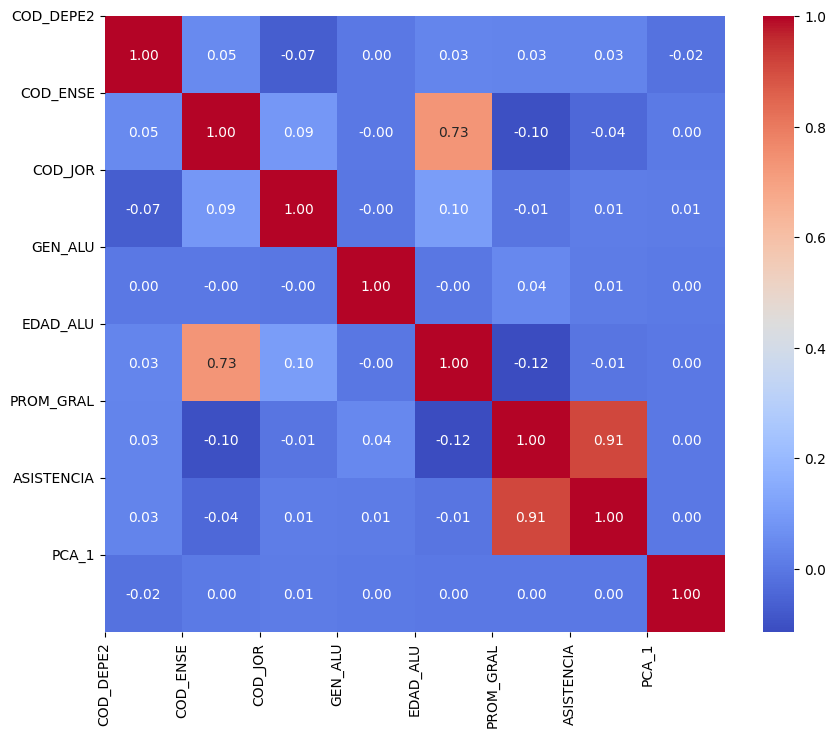

In [116]:
corr = df_3.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## 2.2. Grafico de puntos de promedio general vs asistencia

In [117]:
data_sample = df_3.sample(n=10000, random_state=42)

El gráfico muesta la relación directa que tiene la asistencia con el promedio anual del alumno (relación que parece importante por el heatmap), además se muestra la distribución de cada variable por separado.

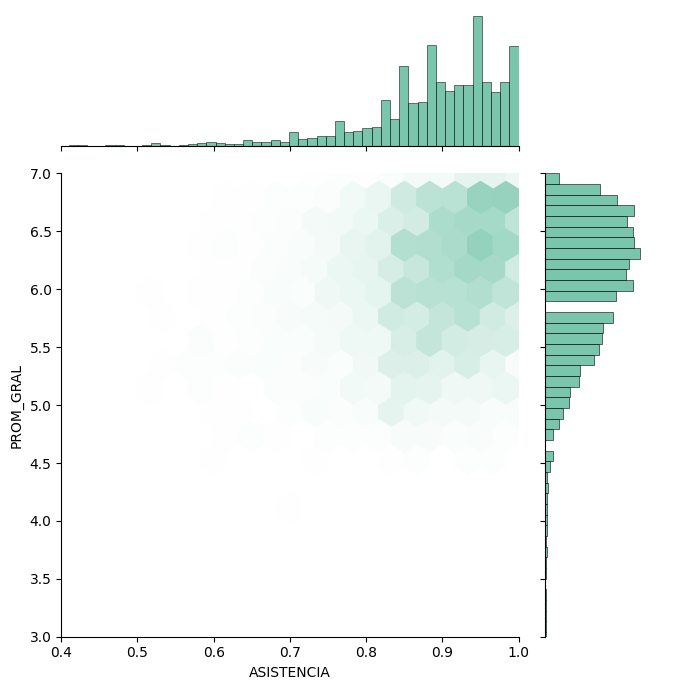

In [118]:
sns.jointplot(x="ASISTENCIA", y="PROM_GRAL",kind="hex", joint_kws=dict(gridsize=30), data=data_sample,height=7, ratio=3, color="#4CB391")
plt.ylim(3, 7)
plt.xlim(0.4, 1)
plt.show()

## 2.3. Histograma de promedio general vs tipo de jornada

In [119]:
data_sample

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,NOM_REG_RBD_A,PCA_1
1890610,2.0,110.0,1.0,1.0,0.114286,6.0,0.84,RM,1.375023e-08
2758419,5.0,110.0,3.0,2.0,0.114286,5.7,0.99,LAGOS,7.761761e-09
609120,1.0,110.0,3.0,1.0,0.114286,5.8,0.84,MAULE,1.744969e-08
1362280,2.0,310.0,1.0,2.0,0.200000,6.4,0.91,RM,1.454084e-08
2695822,2.0,110.0,3.0,1.0,0.128571,6.7,0.78,ARAUC,8.837774e-09
...,...,...,...,...,...,...,...,...,...
396576,2.0,110.0,2.0,1.0,0.071429,6.7,0.81,VALPO,1.809189e-08
2558159,2.0,110.0,3.0,2.0,0.114286,6.4,1.00,MAULE,1.035957e-08
2797795,2.0,110.0,3.0,2.0,0.085714,6.0,0.33,LAGOS,7.614109e-09
3013275,2.0,110.0,3.0,2.0,0.100000,6.5,0.96,RM,7.227352e-09


In [120]:
data_sample['COD_JOR'] = pd.to_numeric(data_sample['COD_JOR'], errors='coerce')
data_sample['COD_JOR'] = data_sample['COD_JOR'].astype(float)

In [121]:
data_sample_avg = data_sample.groupby('COD_JOR').mean()["PROM_GRAL"]

/var/folders/l5/2rxggm8s7mv2g33kfr8sbw780000gn/T/ipykernel_89299/4105789679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_sample_avg = data_sample.groupby('COD_JOR').mean()["PROM_GRAL"]


In [122]:
data_sample_avg

COD_JOR
1.0    5.523018
2.0    5.401268
3.0    5.523963
Name: PROM_GRAL, dtype: float64

En el siguiente gráfico muestra el promedio general de cada jornada junto a la proporción entre los alumnos que aprobaron y que reprobaron.

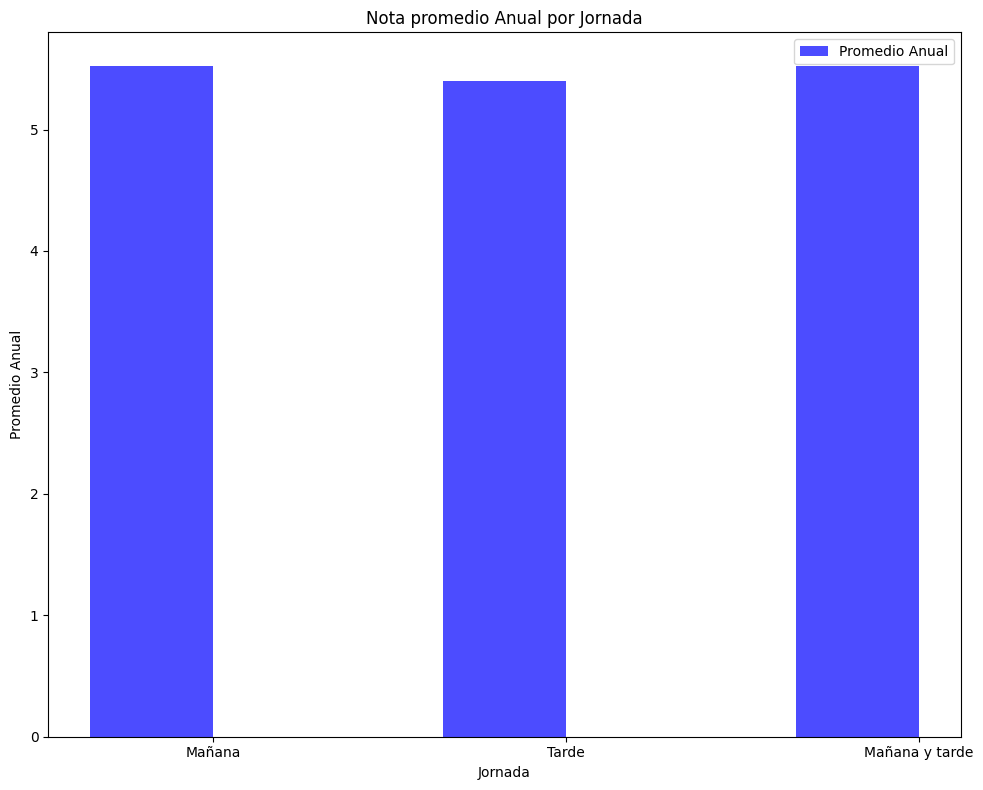

In [123]:
import numpy as np



fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.7
index = np.arange(len(data_sample_avg))


fig.set_size_inches(10, 8)


rects1 = ax.bar(index, data_sample_avg.values, bar_width, alpha=opacity, color='blue', label='Promedio Anual')


plt.xlabel('Jornada')
plt.ylabel('Promedio Anual')

x_labels = {
    0: 'Mañana',
    1: 'Tarde',
    2: 'Mañana y tarde',
    3: 'Nocturna'
}
plt.xticks(index + bar_width/2, [x_labels.get(label) for label in data_sample_avg.index - 1])

plt.legend()
plt.title('Nota promedio Anual por Jornada')

plt.tight_layout()
plt.show()




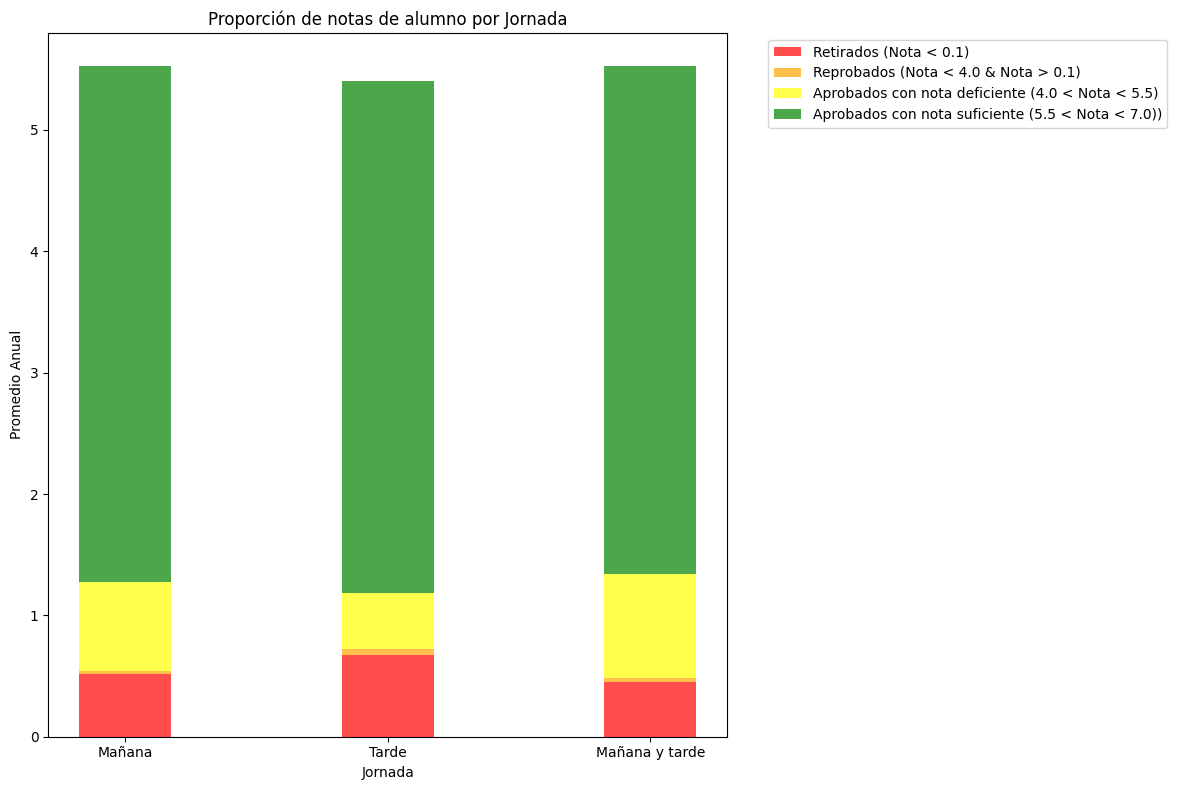

In [124]:
import numpy as np

# Group the students by their grades and times of day.
grouped_data = data_sample.groupby('COD_JOR')['PROM_GRAL'].apply(lambda x: np.histogram(x, bins=[0, 0.1, 4.0, 5.5, 7.0])[0] / len(x))
retired_proportions = grouped_data.apply(lambda x: x[0])
failure_proportions = grouped_data.apply(lambda x: x[1])
defficient_proportions = grouped_data.apply(lambda x: x[2])
pass_proportions = grouped_data.apply(lambda x: x[3])

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.7
index = np.arange(len(data_sample_avg))

fig.set_size_inches(12, 8)

rect_1 = ax.bar(index + bar_width, data_sample_avg.values * retired_proportions, bar_width, alpha=opacity, color='red', label='Retirados (Nota < 0.1)')
rects2 = ax.bar(index + bar_width, failure_proportions * data_sample_avg.values, bar_width, alpha=opacity, bottom=retired_proportions * data_sample_avg.values, color='orange', label='Reprobados (Nota < 4.0 & Nota > 0.1)')
rects3 = ax.bar(index + bar_width, defficient_proportions * data_sample_avg.values, bar_width, bottom=(failure_proportions + retired_proportions) * data_sample_avg.values, alpha=opacity, color='yellow', label='Aprobados con nota deficiente (4.0 < Nota < 5.5)')
rects4 = ax.bar(index + bar_width, pass_proportions * data_sample_avg.values, bar_width, bottom=(failure_proportions + defficient_proportions + retired_proportions) * data_sample_avg.values, alpha=opacity, color='green', label='Aprobados con nota suficiente (5.5 < Nota < 7.0))')

plt.xlabel('Jornada')
plt.ylabel('Promedio Anual')

x_labels = {
    0: 'Mañana',
    1: 'Tarde',
    2: 'Mañana y tarde',
    3: 'Nocturna'
}
plt.xticks(index + bar_width, [x_labels.get(label) for label in data_sample_avg.index - 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Proporción de notas de alumno por Jornada')

plt.tight_layout()
plt.show()


In [125]:
# ## Clustering mediante TSNE
# X = df_3.drop(["PROM_GRAL", "NOM_RBD", "NOM_COM_ALU"], axis=1)

# ## Take only 10000 rows of X
# X_1 = X.sample(n=10000, random_state=42)

# encoded_data = pd.get_dummies(X_1, columns=["COD_DEPE2", "RURAL_RBD", "ESTADO_ESTAB", "COD_ENSE", "COD_GRADO", "COD_JOR", "GEN_ALU", "SIT_FIN_R"]) 
# encoded_data = encoded_data.apply(pd.to_numeric, errors='coerce')
# encoded_data_1 = encoded_data.dropna()
# y = df_3["PROM_GRAL"]
# tsne = TSNE(n_components=2, random_state=42)
# data_tsne = tsne.fit_transform(encoded_data_1)
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(data_tsne)


In [126]:
# plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters)
# plt.title("t-SNE Clustering")
# plt.show()


# 3. Modelos de prediccion de promedio general

## 3.1 Creacion nueva columna "Estado_notas"

In [127]:
## Creamos la nueva columna "ESTADO_NOTAS" que tendra 5 estados (4: aprobado con excelencia, 3: aprobado suficiente, 2: aprobado deficiente 1: Reprobado, 0: Retirado), este sera 3 si ["PROM_GRAL"] > 6.0, 2 si 6.0 > ["PROM_GRAL"] > 5.0, 1 si 5.0 > ["PROM_GRAL"] > 4.0 y 0 si ["PROM_GRAL"] < 4.0

# Create the "ESTADO_NOTAS" column with 4 states
df_3["ESTADO_NOTAS"] = np.where(df_3["PROM_GRAL"] >= 6.0, 4, np.nan)
df_3["ESTADO_NOTAS"] = np.where((df_3["PROM_GRAL"] < 6.0) & (df_3["PROM_GRAL"] >= 5.0), 3, df_3["ESTADO_NOTAS"])
df_3["ESTADO_NOTAS"] = np.where((df_3["PROM_GRAL"] < 5.0) & (df_3["PROM_GRAL"] >= 4.0), 2, df_3["ESTADO_NOTAS"])
df_3["ESTADO_NOTAS"] = np.where((df_3["PROM_GRAL"] < 4.0) & (df_3["PROM_GRAL"] >= 1.0), 1, df_3["ESTADO_NOTAS"])
df_3["ESTADO_NOTAS"] = np.where(df_3["PROM_GRAL"] < 1.0, 0, df_3["ESTADO_NOTAS"])


# Convert the "ESTADO_NOTAS" column to integers
df_3["ESTADO_NOTAS"] = df_3["ESTADO_NOTAS"].astype(int)


In [128]:
df_3

,COD_DEPE2,COD_ENSE,COD_JOR,GEN_ALU,EDAD_ALU,PROM_GRAL,ASISTENCIA,NOM_REG_RBD_A,PCA_1,ESTADO_NOTAS
19,5.0,510.0,1.0,1.0,0.185714,4.5,0.85,AYP,1.813122e-08,2
20,5.0,510.0,1.0,1.0,0.200000,5.1,0.89,AYP,1.813122e-08,3
21,5.0,510.0,1.0,1.0,0.214286,5.3,0.89,AYP,1.813122e-08,3
22,5.0,510.0,1.0,2.0,0.214286,5.9,0.90,AYP,1.820035e-08,3
23,5.0,510.0,1.0,1.0,0.200000,0.0,0.00,AYP,1.813122e-08,0
...,...,...,...,...,...,...,...,...,...,...
3251386,3.0,110.0,3.0,2.0,0.100000,6.7,0.86,RM,1.692763e-10,4
3251387,3.0,110.0,3.0,1.0,0.100000,6.6,0.95,RM,1.692762e-10,4
3251388,3.0,110.0,3.0,2.0,0.085714,6.6,0.96,RM,1.723106e-10,4
3251389,3.0,110.0,3.0,2.0,0.100000,6.9,0.92,RM,1.726947e-10,4


## 3.2. Encoding y train-test split

In [129]:
## Import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Import clasification report
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

In [130]:
encoded_df = pd.get_dummies(df_3.drop(["PROM_GRAL", "NOM_REG_RBD_A"], axis=1), columns=["COD_DEPE2", "COD_ENSE", "COD_JOR", "GEN_ALU"])
## Replace commas with dots in PROM_GRAL
encoded_df_1 = encoded_df.apply(pd.to_numeric, errors='coerce')
encoded_df_1

,EDAD_ALU,ASISTENCIA,PCA_1,ESTADO_NOTAS,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0
19,0.185714,0.85,1.813122e-08,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
20,0.200000,0.89,1.813122e-08,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
21,0.214286,0.89,1.813122e-08,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
22,0.214286,0.90,1.820035e-08,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
23,0.200000,0.00,1.813122e-08,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251386,0.100000,0.86,1.692763e-10,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3251387,0.100000,0.95,1.692762e-10,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3251388,0.085714,0.96,1.723106e-10,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3251389,0.100000,0.92,1.726947e-10,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [162]:
balanced_data = encoded_df_1.drop(["PCA_1"], axis=1)
balanced_data

,EDAD_ALU,ASISTENCIA,ESTADO_NOTAS,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0
19,0.185714,0.85,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
20,0.200000,0.89,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
21,0.214286,0.89,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
22,0.214286,0.90,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
23,0.200000,0.00,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251386,0.100000,0.86,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3251387,0.100000,0.95,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3251388,0.085714,0.96,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3251389,0.100000,0.92,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


## 3.2.1 Train-test split

In [163]:
## Split data using traiin_test_split

x_train, x_test, y_train, y_test = train_test_split(balanced_data.drop(["ESTADO_NOTAS"], axis=1), balanced_data["ESTADO_NOTAS"], test_size=0.2, random_state=42, stratify=balanced_data["ESTADO_NOTAS"])

In [188]:
## Create data of train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

## 3.2. Regresion lineal

### 3.2.1. Tomamos una muestra de 50000 datos para entrenar y validar el modelo

In [189]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data

,EDAD_ALU,ASISTENCIA,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0,ESTADO_NOTAS
2573041,0.142857,0.94,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,4
1693744,0.100000,0.82,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4
3247408,0.228571,0.90,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,4
2934272,0.142857,0.91,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,4
1903263,0.228571,0.88,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012965,0.171429,0.95,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4
1626270,0.200000,0.84,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3235618,0.242857,0.62,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2
3023071,0.214286,0.86,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,3


In [190]:
# Count the number of samples in each class
class_counts = train_data["ESTADO_NOTAS"].value_counts()

# Set the desired number of samples for the minority class (e.g., 10500 for class 0)
desired_samples = 12000

# Initialize an empty dataframe for the balanced dataset
balanced_data = pd.DataFrame()

# Undersample the majority classes
for class_label, count in class_counts.items():
    if class_label != 1:
        # Select a random subset of samples from the current class
        undersampled_subset = train_data[train_data["ESTADO_NOTAS"] == class_label].sample(n=desired_samples, random_state=42)
        # Append the undersampled subset to the balanced dataset
        balanced_data = pd.concat([balanced_data, undersampled_subset])

# Include all samples from the minority class (class 0)
balanced_data = pd.concat([balanced_data, train_data[train_data["ESTADO_NOTAS"] == 1]])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the class distribution in the balanced dataset
print(balanced_data["ESTADO_NOTAS"].value_counts())


0    12000
4    12000
2    12000
3    12000
1    10363
Name: ESTADO_NOTAS, dtype: int64


In [191]:
## Now we want to separate the data into x and y from balanced_data
x_train_balanced = balanced_data.drop(["ESTADO_NOTAS"], axis=1)
y_train_balanced = balanced_data["ESTADO_NOTAS"]
balanced_data

,EDAD_ALU,ASISTENCIA,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0,ESTADO_NOTAS
0,0.142857,0.00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0.114286,0.84,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,4
2,0.185714,0.85,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,2
3,0.128571,0.90,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,3
4,0.185714,0.85,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58358,0.171429,0.85,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
58359,0.171429,0.93,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2
58360,0.142857,0.96,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4
58361,0.214286,0.93,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,3


In [192]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)


In [193]:
## Get the unique values
unique_values = np.unique(y_train_encoded)
unique_values

array([0, 1, 2, 3, 4])

In [194]:
clf = LinearRegression()
clf.fit(x_train_balanced, y_train_encoded)


LinearRegression()

In [195]:
y_pred = clf.predict(x_test)
y_pred_rounded = np.round(y_pred).astype(int)

## Remove -1 values
y_pred_rounded[y_pred_rounded < 0] = 0

In [196]:
y_pred_decoded = label_encoder.inverse_transform(y_pred_rounded)
y_true_decoded = label_encoder.inverse_transform(y_test_encoded)

In [197]:


print(classification_report(y_true_decoded, y_pred_decoded))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     50851
           1       0.14      0.36      0.20      2878
           2       0.14      0.33      0.20     23705
           3       0.33      0.81      0.47    191667
           4       0.90      0.09      0.17    353881

    accuracy                           0.40    622982
   macro avg       0.50      0.51      0.40    622982
weighted avg       0.70      0.40      0.33    622982



Se mejoraria usando gmm?

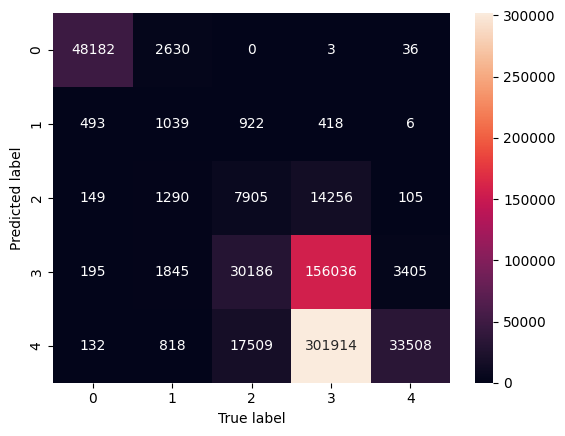

In [198]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true_decoded, y_pred_decoded)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

## 3.3. Perceptron Multilayer


In [199]:
from keras.callbacks import Callback

class EarlyStoppingByLossAndAcc(Callback):
    def __init__(self, monitor='val_loss', patience=0):
        super(EarlyStoppingByLossAndAcc, self).__init__()
        self.monitor = monitor
        self.patience = patience
        self.best_weights = None
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.Inf
        self.best_acc = 0.0
        self.wait_acc = 0

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        current_acc = logs.get('val_accuracy')
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.best and current_acc > self.best_acc:
            self.best = current
            self.best_acc = current_acc
            self.wait = 0
            self.wait_acc = 0
            self.best_weights = self.model.get_weights()
        elif current_acc < self.best_acc and current >= self.best:
            self.wait_acc += 1
            if self.wait_acc >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print(f"Early stopping due to no improvement in accuracy after {self.patience} epochs.")
        elif current_acc >= self.best_acc and current >= self.best:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print(f"Early stopping due to no improvement in loss after {self.patience} epochs.")
[]

In [231]:
x_val.shape


(249193, 21)

In [241]:
## Sample of x val and y val depending on maintaining the representation of  "ESTADO_NOTAS"
x_val_sample, x_test, y_val_sample, y_test = train_test_split(x_val, y_val, test_size=0.8, random_state=42, stratify=y_val)
print('Shape of x_val_sample:', x_val_sample.shape)
print('Shape of y_val_sample:', y_val_sample.shape)


Shape of x_val_sample: (49838, 21)
Shape of y_val_sample: (49838,)


In [242]:
print('Shape of y_train_balanced_one_hot:', y_train_balanced_one_hot.shape)


Shape of y_train_balanced_one_hot: (58363, 5)


In [250]:
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder



# Define the input shape
input_shape = (21,) # assuming 10 features of type int

# Define the number of classes
num_classes = 5 # for example

# Create the model
model = Sequential()

# Add the input layer
model.add(Dense(units=256, activation='relu', input_shape=input_shape))

# Add one or more hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=num_classes, activation='softmax'))

y_train_balanced_one_hot = to_categorical(y_train_balanced, num_classes=num_classes)
y_val_sample_one_hot = to_categorical(y_val_sample, num_classes=num_classes)

# Compile the model
opt = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
callback = EarlyStoppingByLossAndAcc(monitor='val_loss', patience=5)

 # Train the model
model.fit(x_train_balanced, y_train_balanced_one_hot,  epochs=80, batch_size=1024, validation_data=(x_val_sample, y_val_sample_one_hot))

Epoch 1/80
57/57 [==============================] - 2s 23ms/step - loss: 1.1614 - accuracy: 0.4795 - val_loss: 1.0317 - val_accuracy: 0.4915
Epoch 2/80
57/57 [==============================] - 1s 18ms/step - loss: 0.9178 - accuracy: 0.5757 - val_loss: 1.0085 - val_accuracy: 0.5480
Epoch 3/80
57/57 [==============================] - 1s 20ms/step - loss: 0.9012 - accuracy: 0.5857 - val_loss: 0.9233 - val_accuracy: 0.5916
Epoch 4/80
57/57 [==============================] - 1s 19ms/step - loss: 0.8919 - accuracy: 0.5910 - val_loss: 0.9953 - val_accuracy: 0.5532
Epoch 5/80
57/57 [==============================] - 1s 18ms/step - loss: 0.8921 - accuracy: 0.5904 - val_loss: 0.9160 - val_accuracy: 0.5848
Epoch 6/80
57/57 [==============================] - 1s 20ms/step - loss: 0.8884 - accuracy: 0.5930 - val_loss: 1.0061 - val_accuracy: 0.5416
Epoch 7/80
57/57 [==============================] - 1s 19ms/step - loss: 0.8770 - accuracy: 0.6000 - val_loss: 0.9044 - val_accuracy: 0.6101
Epoch 8/80
57

## 3.4 Random Forrest


In [179]:
ensemble_models = []


In [180]:
# separo las clases mayoritarias con las minoritarias

n_iteraciones = 10

for i in range(n_iteraciones):

    # entreno el modelo
    model = RandomForestClassifier(n_estimators=100, random_state=i)
    model.fit(x_train_balanced, y_train_balanced)

    # guardo el modelo
    ensemble_models.append(model)

In [181]:
# count the number of class "2" that there are in y_train_resampled
y_train_balanced.value_counts()


3    12000
4    12000
2    12000
0    12000
1    11514
Name: ESTADO_NOTAS, dtype: int64

In [182]:
ensemble_predictions = []

# predigo por cada modelo
for model in ensemble_models:
    ensemble_predictions.append(model.predict(x_test))


In [183]:
# hago la media de las predicciones
final_predictions = np.mean(ensemble_predictions, axis=0)
final_predictions = np.round(final_predictions).astype(int)

In [184]:
print(classification_report(y_test, final_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50851
           1       0.07      0.65      0.13      2878
           2       0.09      0.39      0.14     23705
           3       0.41      0.37      0.39    191667
           4       0.77      0.58      0.66    353881

    accuracy                           0.54    622982
   macro avg       0.47      0.60      0.46    622982
weighted avg       0.65      0.54      0.58    622982



## 3.5. Decision Tree

# 4. Modelo de prediccion de la situacion de promocion al finalizar el año escolar.

# 5. Explainer

In [185]:
import lime


In [186]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    color: white;
}
</style>
""")


In [187]:
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier

# Define a prediction function for the ensemble
def ensemble_predict_proba(data):
    # Get the predictions from each model
    predictions = np.array([model.predict_proba(data) for model in ensemble_models])
    
    # Average the predictions and return
    return predictions.mean(axis=0)

# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_balanced.to_numpy(), 
                                                   feature_names=x_train_balanced.columns, 
                                                   class_names=["ESTADO_NOTAS"], 
                                                   discretize_continuous=True)

# Choose a random instance to explain
i = np.random.randint(0, x_train_balanced.shape[0])

# Generate explanation
exp = explainer.explain_instance(x_train_balanced.iloc[i], ensemble_predict_proba, num_features=5)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarni

In [157]:
def ensemble_predict_proba(X):
    ensemble_predictions = []
    for model in ensemble_models:
        predictions = model.predict_proba(X)
        ensemble_predictions.append(predictions)
    final_predictions = np.mean(ensemble_predictions, axis=0)
    return final_predictions

In [158]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_balanced),
    mode='classification',
    feature_names=x_train_balanced.columns,
    class_names=["0", "1", "2", "3", "4"],
    random_state=42
)

In [159]:
instance_idx = 0 
instance = x_test.iloc[instance_idx]

In [160]:
explanation = explainer.explain_instance(
    data_row=np.array(instance),
    predict_fn=ensemble_predict_proba,
    num_features=len(x_train_balanced.columns)
)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:439: UserWarni

In [161]:
explanation = explainer.explain_instance(
    data_row=np.array(instance),
    classifier_fn=model.predict_proba,
    num_features=len(x_train.columns)
)

TypeError: explain_instance() got an unexpected keyword argument 'classifier_fn'

# 6. Modelo de deep learning

In [ ]:
## We import the model of fast ai
from fastai.tabular.all import *


ModuleNotFoundError: No module named 'fastai'

In [ ]:
## Concat x_train_sample and y_train_sample
df_train = pd.concat([x_train_sample, y_train_sample], axis=1)

NameError: name 'x_train_sample' is not defined

In [ ]:
df_train

,EDAD_ALU,ASISTENCIA,PCA_1,COD_DEPE2_1.0,COD_DEPE2_2.0,COD_DEPE2_3.0,COD_DEPE2_4.0,COD_DEPE2_5.0,COD_ENSE_110.0,COD_ENSE_310.0,COD_ENSE_410.0,COD_ENSE_510.0,COD_ENSE_610.0,COD_ENSE_710.0,COD_ENSE_810.0,COD_JOR_1.0,COD_JOR_2.0,COD_JOR_3.0,COD_JOR_4.0,GEN_ALU_0.0,GEN_ALU_1.0,GEN_ALU_2.0,SIT_FIN_R_,SIT_FIN_R_P,SIT_FIN_R_R,SIT_FIN_R_T,SIT_FIN_R_Y,NOM_REG_RBD_A_ANTOF,NOM_REG_RBD_A_ARAUC,NOM_REG_RBD_A_ATCMA,NOM_REG_RBD_A_AYP,NOM_REG_RBD_A_AYSEN,NOM_REG_RBD_A_BBIO,NOM_REG_RBD_A_COQ,NOM_REG_RBD_A_LAGOS,NOM_REG_RBD_A_LGBO,NOM_REG_RBD_A_MAG,NOM_REG_RBD_A_MAULE,NOM_REG_RBD_A_NUBLE,NOM_REG_RBD_A_RIOS,NOM_REG_RBD_A_RM,NOM_REG_RBD_A_TPCA,NOM_REG_RBD_A_VALPO,ESTADO_NOTAS
682977,0.192982,0.19,1.604093e-08,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1840572,0.210526,0.46,1.427586e-08,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
671380,0.263158,0.19,1.608972e-08,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1411931,0.245614,0.66,1.398997e-08,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
580297,0.228070,0.21,1.710774e-08,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341119,0.087719,0.79,1.448825e-08,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1385220,0.070175,0.93,1.403945e-08,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2781165,0.175439,0.96,7.068167e-09,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
244586,0.175439,0.84,1.767566e-08,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
## We split the data of df_3 to be used in deep learning model

# Define your DataFrame (df_train) and target variable name ("ESTADO_NOTAS")

# Create data splits
splits = RandomSplitter()(df_train)

# Set up TabularPandas
procs = [Categorify, FillMissing]
y_names = "ESTADO_NOTAS"
y_block = CategoryBlock()
dls = TabularPandas(df_train, procs=procs, y_names=y_names, y_block=y_block, splits=splits).dataloaders(path=".")

# Create a tabular learner
learn = tabular_learner(dls, metrics=accuracy)

# Train your model
learn.fit(5)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


epoch,train_loss,valid_loss,accuracy,time


UnboundLocalError: local variable 'x' referenced before assignment